
[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


STD Series: From 0.001 to 1.0
Input range: From -6.0 to 6.0
Generated 1000000 cartesian products in total
    Series1  Series2  Series3  Label
0 -6.000000     -1.0    0.001    0.0
1 -5.755102     -1.0    0.001    0.0
2 -5.510204     -1.0    0.001    0.0
3 -5.265306     -1.0    0.001    0.0
4 -5.020408     -1.0    0.001    0.0


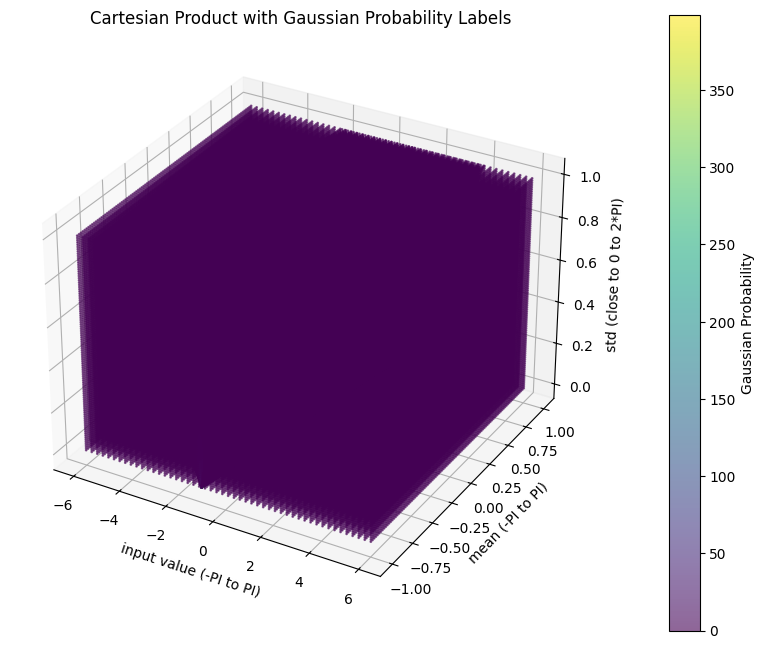

In [1]:
# Install necessary dependencies
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 100

# STD Series: From a very small number close to 0 to 2*PI, to insure wide representation of std values. Low ones having a "sharper" curve, higher ones having a "flatter" curve.
# Potentially want to distribute it more over the higher numebrs, since lower numbers are less likely to be used in practice.
small_number = 0.001
std = np.linspace(small_number, 1, num_values)
print(f"STD Series: From {std.min()} to {std.max()}")

# Mean Series: From -PI to +PI, just a wide range to shift the center of the curve to different locations.
mean = np.linspace(-1, 1, num_values)

# We add a minimum input value and maximum input value based on the smallest and highest mean and the maximum std values
min_input = mean.min() - 5 * std.max()
max_input = mean.max() + 5 * std.max()

print(f"Input range: From {min_input} to {max_input}")

# Now for each std and mean, we want to generate a set of 100 input values for each mean std pair, resulting in 100 * 100 * 100 = 1,000,000 input values in the end.
# We want input values to be distributed around the mean, with a maximum of 3 standard deviations away from the mean.
# Input values further away from the mean should be rarer, with more existing closer to the mean.
cartesian_product = []
for m, s in itertools.product(mean, std):
    # Generate Input values
    inputval = []
    # Linearly spaced values from min_input to max_input for 50% of the values
    samples = np.linspace(min_input, max_input, int(num_values * 0.5))
    
    # Add samples with a normal distribution around the mean for the remaining 50% of the values
    normal_samples = [m]
    extra_lin_samples = np.linspace(m - 3 * s, m + 3 * s, int(num_values * 0.49))
    samples = np.concatenate((samples, normal_samples, extra_lin_samples))
    
    inputval.extend(samples)
    # Make cartesian product for input values and m, s
    cartesian_product_input = list(itertools.product(inputval, [m], [s]))
    cartesian_product.extend(cartesian_product_input)

print(f"Generated {len(cartesian_product)} cartesian products in total")

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# Scatter plot with color representing the labels
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', s=1, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Gaussian Probability')

# Label the axes
ax.set_xlabel('input value (-PI to PI)')
ax.set_ylabel('mean (-PI to PI)')
ax.set_zlabel('std (close to 0 to 2*PI)')

plt.title('Cartesian Product with Gaussian Probability Labels')
plt.show()


In [2]:
cartesian_df.describe()

,Series1,Series2,Series3,Label
count,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06
mean,-5.405809e-17,3.874447e-16,0.500500,1.296260e+00
std,2.632193e+00,5.831532e-01,0.291285,1.560080e+01
min,-6.000000e+00,-1.000000e+00,0.001000,0.000000e+00
25%,-1.346939e+00,-5.000000e-01,0.250750,4.195522e-09
50%,0.000000e+00,5.551115e-17,0.500500,4.487528e-02
75%,1.346939e+00,5.000000e-01,0.750250,3.926402e-01
max,6.000000e+00,1.000000e+00,1.000000,3.989423e+02


In [3]:
labels.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Label, dtype: float64

In [4]:
labels.describe()

count    1.000000e+06
mean     1.296260e+00
std      1.560080e+01
min      0.000000e+00
25%      4.195522e-09
50%      4.487528e-02
75%      3.926402e-01
max      3.989423e+02
Name: Label, dtype: float64

In [18]:
import numpy as np

# Example labels (replace with your actual labels)
labels = cartesian_df['Label']

labels.quantile(0.999)

np.float64(328.1848729125327)

(array([9.76454e+05, 1.12620e+04, 3.24400e+03, 1.61600e+03, 1.61200e+03,
        4.02000e+02, 4.02000e+02, 6.02000e+02, 6.04000e+02, 2.00000e+02,
        2.00000e+02, 0.00000e+00, 0.00000e+00, 2.00000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+02, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00

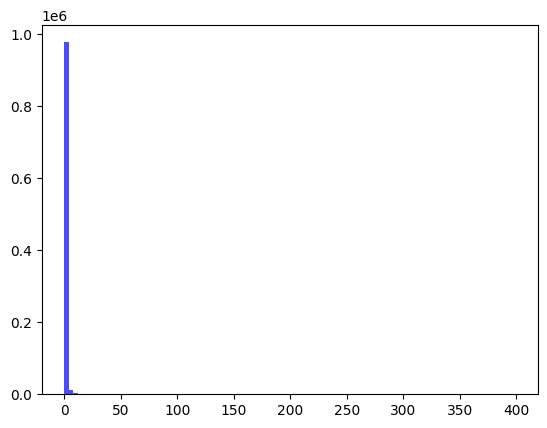

In [6]:
import numpy as np
import pandas as pd

# Assuming cartesian_df is your DataFrame with 'Label' column
# Step 1: Apply log transformation to the labels (to handle very small values)
#cartesian_df['Label'] = np.log1p(cartesian_df['Label'])  # log1p to handle values close to 0

cartesian_df['Label'].describe()
plt.hist(cartesian_df['Label'], bins=100, color='blue', alpha=0.7, label='Label Distribution')

In [7]:
cartesian_df['Label'].quantile(0.9)

np.float64(0.9101967226260093)

In [8]:
# Do duplicate rows exist?
duplicates = cartesian_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 6890


In [ ]:
# Install necessary dependency
!pip install scikit-learn

from sklearn.model_selection import train_test_split
import pickle

# Additionally save a normalized version of the dataset
# With feature AND label normalization

# Standardize the features and labels
cartesian_df_unchanged = cartesian_df.copy()
print(cartesian_df_unchanged.describe())

# Log1p transform the labels
cartesian_df_unchanged['Label'] = np.log1p(cartesian_df_unchanged['Label'])

# Split the standardized dataset and save with scalers
train_df, test_df = train_test_split(cartesian_df_unchanged, test_size=0.2, train_size=0.8, random_state=42)

# Save the datasets to files
train_file = "./extraextra_lin_unchangedinp_log1p_train_data.csv"
test_file = "./extraextra_lin_unchangedinp_log1p_test_data.csv"

# Save files
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


            Series1       Series2         Series3         Label
count  1.000000e+06  1.000000e+06  1000000.000000  1.000000e+06
mean  -5.405809e-17  3.874447e-16        0.500500  1.296260e+00
std    2.632193e+00  5.831532e-01        0.291285  1.560080e+01
min   -6.000000e+00 -1.000000e+00        0.001000  0.000000e+00
25%   -1.346939e+00 -5.000000e-01        0.250750  4.195522e-09
50%    0.000000e+00  5.551115e-17        0.500500  4.487528e-02
75%    1.346939e+00  5.000000e-01        0.750250  3.926402e-01
max    6.000000e+00  1.000000e+00        1.000000  3.989423e+02


In [10]:
# Print for all mean and std combinations the reference curve and the input points
import matplotlib.pyplot as plt

# Group by mean and std

#grouped = cartesian_df.groupby(['Series2', 'Series3'])

# Plot the reference curve and input points for each group

# for name, group in grouped:
#     mean, std = name
#     x = np.linspace(min_input, max_input, 1000)
#     y = gaussian_probability(x, mean, std)
#     plt.plot(x, y, label='Reference Curve')
#     plt.scatter(group['Series1'], group['Label'], label='Input Points', color='red', s=5)
#     plt.title(f'Mean: {mean}, Std: {std}')
#     plt.xlabel('Input Value')
#     plt.ylabel('Label')
#     plt.legend()
#     plt.show()
#     print(len(group['Series1']))


In [11]:
train_df["Label"].describe()

count    8.000000e+05
mean     2.498894e-01
std      5.131788e-01
min      0.000000e+00
25%      4.289651e-09
50%      4.391191e-02
75%      3.308511e-01
max      5.991320e+00
Name: Label, dtype: float64

In [12]:
test_df["Label"].describe()

count    2.000000e+05
mean     2.515965e-01
std      5.147689e-01
min      0.000000e+00
25%      3.799229e-09
50%      4.375688e-02
75%      3.334947e-01
max      5.991320e+00
Name: Label, dtype: float64

In [13]:
# identify outliers
cut_off = train_df["Label"].std() * 3
data_mean = train_df["Label"].mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train_df["Label"].values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in train_df["Label"].values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

outlieres_removed_series = pd.Series(outliers_removed)
print(outlieres_removed_series.describe())
outlieres_removed_series.quantile(0.50)

Identified outliers: 15053
Non-outlier observations: 784947
count    7.849470e+05
mean     1.974551e-01
std      3.057709e-01
min      0.000000e+00
25%      2.000864e-09
50%      3.908745e-02
75%      3.133316e-01
max      1.787640e+00
dtype: float64


np.float64(0.0390874533847375)

In [14]:
# now do the same for the outliers removed series
cut_off = outlieres_removed_series.std() * 3
data_mean = outlieres_removed_series.mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in outlieres_removed_series.values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in outlieres_removed_series.values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 20265
Non-outlier observations: 764682


In [15]:
outliers_removed_series2 = pd.Series(outliers_removed)
outliers_removed_series2.describe()

count    7.646820e+05
mean     1.658502e-01
std      2.372120e-01
min      0.000000e+00
25%      6.620367e-10
50%      3.305399e-02
75%      2.865624e-01
max      1.114018e+00
dtype: float64

(array([326321.,  33376.,  23002.,  18319.,  14719.,  12497.,  12110.,
         10175.,   9357.,   9316.,   7974.,   8244.,   7120.,   7600.,
          6692.,   6787.,   6603.,   6650.,   6033.,   5991.,   6374.,
          5604.,   6288.,   6035.,   6382.,   5767.,   6514.,   6230.,
          6659.,   7492.,   8547.,   8364.,   7054.,   6999.,   5954.,
          6135.,   5215.,   5554.,   4955.,   4418.,   4373.,   4481.,
          4568.,   3272.,   3706.,   3435.,   3087.,   3101.,   3008.,
          2230.,   3279.,   2779.,   2300.,   2400.,   2089.,   2210.,
          2229.,   1860.,   1842.,   1668.,   2112.,   1804.,   1620.,
          1443.,   2097.,    954.,   1280.,   1737.,   1106.,   1402.,
          1732.,    771.,    938.,   1428.,   1397.,    755.,   1209.,
           894.,   1354.,    734.,    566.,   1349.,    879.,    713.,
           699.,   1172.,    556.,    885.,    703.,    696.,   1164.,
           367.,    850.,    522.,    518.,    835.,    364.,    705.,
      

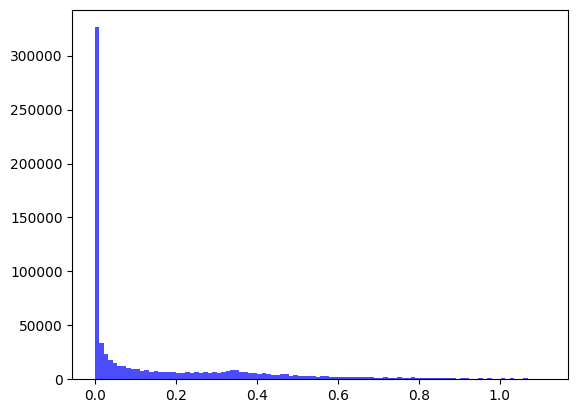

In [16]:
# plot the distribution of the outliers removed series 2
plt.hist(outliers_removed_series2, bins=100, color='blue', alpha=0.7, label='Outliers Removed')